<a href="https://colab.research.google.com/github/Sanjayme049/ML/blob/main/logisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Logistic regression-1.it is a linear model and sigmoid
# 2. It always predicts number between 0 to 1
# 3. For complex decision boundaries we will replace SLR with polynomial regression.
# 4. For regularization we will replace SLR with ridge on Lasso.


In [2]:
# Topic 

# 1. quadrient decent
# 2. Regularization- L2 & L1
# 3. Feature importance
# 4. Maximum Likelihood Estimation


In [3]:
# J(theta) = error= MSE

# J(theta) = 1/m(summation)

In [4]:
# High dimensional regression data
# and you need to select important features, then use Lasso.

# 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
plt.style.use('seaborn')


from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [6]:
data = pd.read_csv('/content/gdrive/My Drive/ML/archive/spam_ham_dataset.csv')

# artificial balancing is needed when only 5-10% higher than the other class.

# Oversamplig- 1. Smote
              # 2. Adasysn


# adaysen and smoke are hilgly sensitive to posiyion of the dataset.
#  thus over 


In [7]:
data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [8]:
data.shape

(5171, 4)

In [9]:
data.drop(['Unnamed: 0', 'label'], axis=1, inplace=True)

In [10]:
data.head()

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


In [11]:
data.shape

(5171, 2)

In [12]:
# data.

# follow the below steps while handling the text data before converting it to numerical


# Stopwords- Words that are cpmmon for both ham & spam.
# 1.Lower Case text
# 2. Remove Subject column
# 3. Special Chraracters & numbers
# 


In [13]:
pip install spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
!python -m spacy download en_core_web_sm

2022-09-24 10:56:10.838283: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 3.2 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [15]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [16]:
text = "swimming is a good game"

In [17]:
data.text = data.text.apply(lambda x: x.lower()[9:])

In [18]:
doc = nlp(text)
for i in doc:
  print(i.text, i.lemma_)

swimming swimming
is be
a a
good good
game game


In [19]:
stopwords = nlp.Defaults.stop_words
data.text = data.text.apply(lambda x: ' '.join([i.lemma_ for i in nlp(x) if i not in stopwords]))

In [20]:
data.text = data.text.str.replace(r'\W+', ' ', regex= True)

In [21]:
import string
data.text = data.text.apply(lambda x: ' '.join([i.text for i in nlp(x) if i.text not in string.ascii_letters]))

In [22]:
data.text = data.text.apply(lambda x: ' '.join([i for i in x.split()]))

In [23]:
data.text[2]

'neon retreat ho ho ho we re around to that most wonderful time of the year neon leader retreat time know that this time of year be extremely hectic and that it tough to think about anything past the holiday but life do go on past the week of december 25 through january 1 and that what like you to think about for minute on the calender that hand out at the beginning of the fall semester the retreat be schedule for the weekend of january 5 6 but because of youth minister conference that brad and dustin be connect with that week we re go to change the date to the follow weekend january 12 13 now come the part you need to think about think we all agree that it important for we to get together and have some time to recharge our battery before we get to far into the spring semester but it can be lot of trouble and difficult for we to get away without kid etc so brad come up with potential alternative for how we can get together on that weekend and then you can let know which you prefer the 

In [24]:
#  now we have data in clean format. we are ready to apply tfidf

from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(max_features = 4000) # it only keep the top 4000 words out of aall the vocab
tfidf_data = vec.fit_transform(data.text)


In [25]:
# to see the dataframe after tfidf
tfidf_df = pd.DataFrame(tfidf_data.toarray(), columns = vec.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [26]:
tfidf_df

,00,000,0000,000000,000080,001,005,01,012,015,...,youth,ypil,yvette,zajac,zero,zimbabwe,zivley,zone,zonedubai,zyban
0,0.118092,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.188366,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.060034,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5166,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.151924,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
5167,0.000000,0.120849,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
5168,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
5169,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [27]:
# concatenate the label to the tfidf_df
ml_data = pd.concat([tfidf_df, data.label_num], axis=1)

In [28]:
# apply the train test and split




X = tfidf_df
y = data.label_num

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [29]:
# apply the machine learning model
#  our data is discrete, so we will apply the logistic regression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [31]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(score)

0.9835748792270531


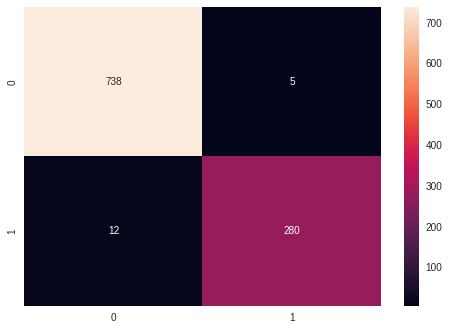

In [33]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_pred, y_test), annot = True, fmt = 'g')